## Rainfall forecasting using the full year data last 3 years

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [11]:
# Load the data
data = pd.read_csv('transformed_rainfall_data.csv', index_col='Date', parse_dates=True)
#data = data.drop([0, 1]).reset_index(drop=True)
data.head()



C:\Users\Admin\AppData\Local\Temp\ipykernel_27552\1536226048.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('transformed_rainfall_data.csv', index_col='Date', parse_dates=True)


,Vavuniya,Anuradhapura,Maha Illuppallama
Date,,,
Latitude,8.75,8.35,8.12
Longitude,80.50,80.38,80.47
20210101,0.00,0.00,0.00
20210102,2.90,0.20,0.00
20210103,3.40,14.20,3.80


In [12]:
# Count the number of zero values
num_zeros = np.count_nonzero(data['Vavuniya'] == 0)

print(f"Number of zero values: {num_zeros}")
# Count the number of zero values
num_zeros = np.count_nonzero(data['Anuradhapura'] == 0)

print(f"Number of zero values: {num_zeros}")
# Count the number of zero values
num_zeros = np.count_nonzero(data['Maha Illuppallama'] == 0)

print(f"Number of zero values: {num_zeros}")

data.shape

Number of zero values: 711
Number of zero values: 717
Number of zero values: 674


(1066, 3)

In [13]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Vavuniya'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


In [14]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 60  # You can change this based on your requirement
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)


In [15]:
# Build the LSTM model with additional layers
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(seq_length, x_train.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


c:\Accadamics\Software tools\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0050 - val_loss: 0.0095
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0045 - val_loss: 0.0096
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0046 - val_loss: 0.0093
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0044 - val_loss: 0.0094
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0043 - val_loss: 0.0092
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0048 - val_loss: 0.0094
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0038 - val_loss: 0.0089
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0045 - val_loss: 0.0093
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0044 - val_loss: 0.0090
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0041 - val_loss: 0.0092
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0044 - val_loss: 0.0093
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step
RMSE: 17.609714356046492


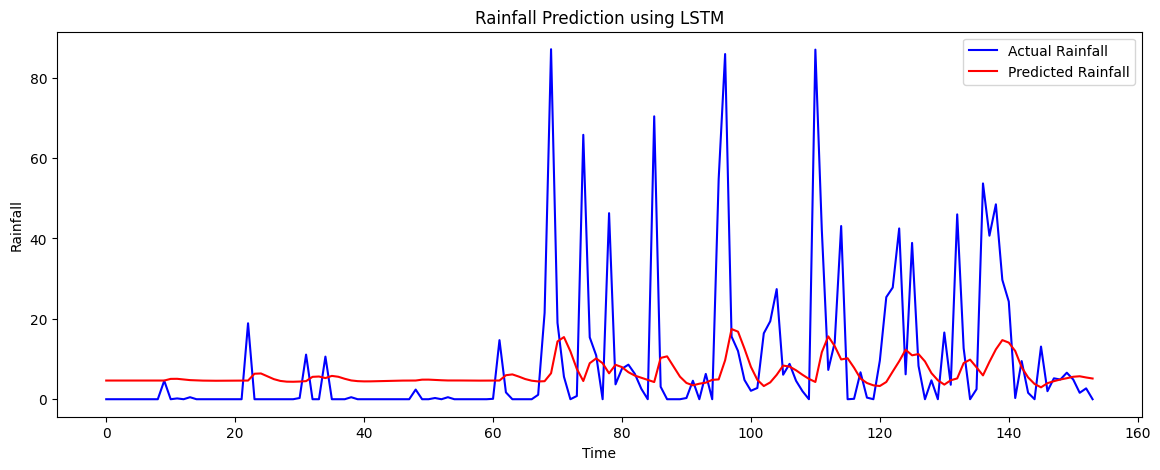

In [17]:
predicted_rainfall = model.predict(x_test)
predicted_rainfall = scaler.inverse_transform(predicted_rainfall)
actual_rainfall = scaler.inverse_transform(y_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(actual_rainfall, predicted_rainfall))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(actual_rainfall, color='blue', label='Actual Rainfall')
plt.plot(predicted_rainfall, color='red', label='Predicted Rainfall')
plt.title('Rainfall Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


c:\Accadamics\Software tools\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Accadamics\Software tools\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Accadamics\Software tools\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 14.78121788095599


c:\Accadamics\Software tools\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Accadamics\Software tools\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Accadamics\Software tools\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


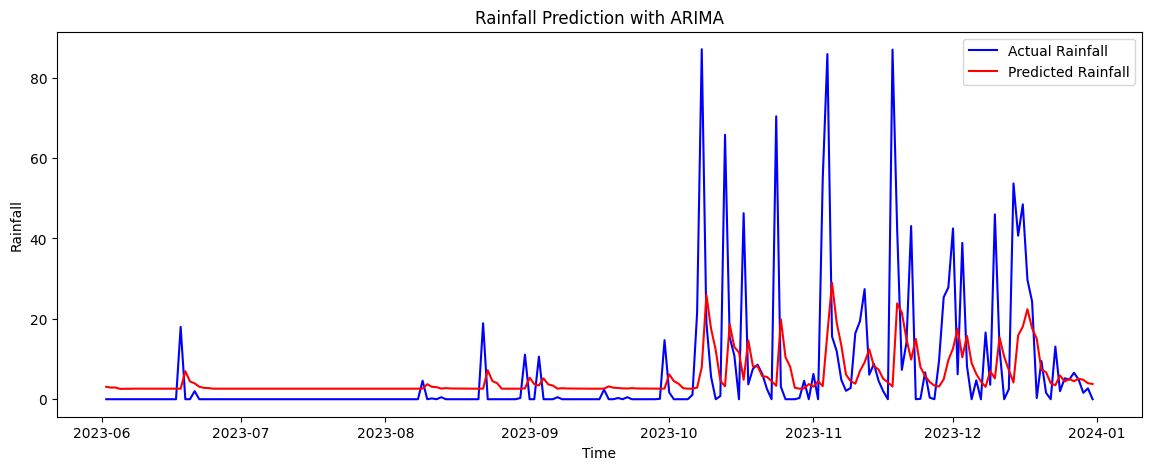

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
ata = pd.read_csv('transformed_rainfall_data_v2.csv', index_col='Date', parse_dates=True)


# Create lag features
data['Vavuniya_lag1'] = data['Vavuniya'].shift(1)
data['Vavuniya_lag2'] = data['Vavuniya'].shift(2)
data['Vavuniya_lag3'] = data['Vavuniya'].shift(3)

# Drop NaN values
data.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Prepare the training and testing datasets
train_X = train_data[['Vavuniya_lag1', 'Vavuniya_lag2', 'Vavuniya_lag3']]
train_y = train_data['Vavuniya']
test_X = test_data[['Vavuniya_lag1', 'Vavuniya_lag2', 'Vavuniya_lag3']]
test_y = test_data['Vavuniya']

# Fit the ARIMA model
model = ARIMA(train_y, exog=train_X, order=(3, 0, 0))  # p=3, d=0, q=0
arima_model = model.fit()

# Make predictions
predictions = arima_model.predict(start=len(train_y), end=len(train_y)+len(test_y)-1, exog=test_X)



# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(test_y.index, test_y, color='blue', label='Actual Rainfall')
plt.plot(test_y.index, predictions, color='red', label='Predicted Rainfall')
plt.title('Rainfall Prediction with ARIMA')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


In [ ]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print(f'RMSE: {rmse}')

RMSE: 14.78121788095599


C:\Users\Admin\AppData\Local\Temp\ipykernel_21308\1902608022.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('transformed_rainfall_data.csv', index_col='Date', parse_dates=True)


Number of zero values in Vavuniya: 711
Number of zero values in Anuradhapura: 717
Number of zero values in Maha Illuppallama: 674
RMSE: 17.55007727990128


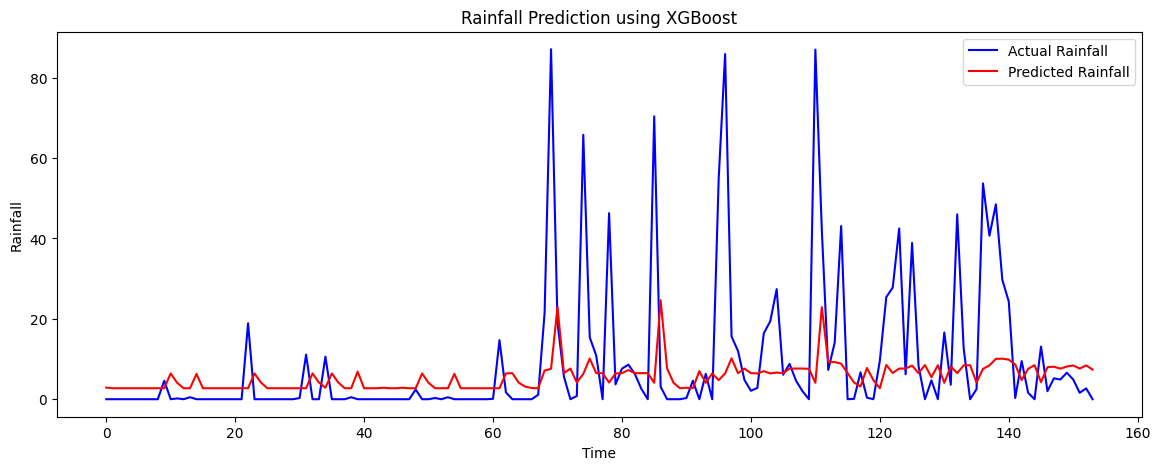

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('transformed_rainfall_data.csv', index_col='Date', parse_dates=True)
data.head()

# Count the number of zero values
num_zeros_vavuniya = np.count_nonzero(data['Vavuniya'] == 0)
num_zeros_anuradhapura = np.count_nonzero(data['Anuradhapura'] == 0)
num_zeros_maha = np.count_nonzero(data['Maha Illuppallama'] == 0)

print(f"Number of zero values in Vavuniya: {num_zeros_vavuniya}")
print(f"Number of zero values in Anuradhapura: {num_zeros_anuradhapura}")
print(f"Number of zero values in Maha Illuppallama: {num_zeros_maha}")

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Vavuniya'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 60  # You can change this based on your requirement
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape the data for XGBoost
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=3)
model.fit(x_train, y_train)

# Make predictions
predicted_rainfall = model.predict(x_test)
predicted_rainfall = scaler.inverse_transform(predicted_rainfall.reshape(-1, 1))
actual_rainfall = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(actual_rainfall, predicted_rainfall))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(actual_rainfall, color='blue', label='Actual Rainfall')
plt.plot(predicted_rainfall, color='red', label='Predicted Rainfall')
plt.title('Rainfall Prediction using XGBoost')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()
